f1Scoreの最大値を求めるプログラム

(1200, 22)
(800, 21)
n_estimators: 1, f1_score(val): 0.3879954539479946
n_estimators: 2, f1_score(val): 0.3821758297460191
n_estimators: 3, f1_score(val): 0.41078710276816927
n_estimators: 4, f1_score(val): 0.41572490545575236
n_estimators: 5, f1_score(val): 0.4440508735545501
n_estimators: 6, f1_score(val): 0.4075326513973853
n_estimators: 7, f1_score(val): 0.39154812331392536
n_estimators: 8, f1_score(val): 0.43205562764138616
n_estimators: 9, f1_score(val): 0.42632166061258864
n_estimators: 10, f1_score(val): 0.4378987048926849
n_estimators: 11, f1_score(val): 0.42870067284960905
n_estimators: 12, f1_score(val): 0.41705028944973027
n_estimators: 13, f1_score(val): 0.4261658359827452
n_estimators: 14, f1_score(val): 0.4671907904732508
n_estimators: 15, f1_score(val): 0.43478672201045554
n_estimators: 16, f1_score(val): 0.4590826802442637
n_estimators: 17, f1_score(val): 0.4839780958650895
n_estimators: 18, f1_score(val): 0.4535353421365176
n_estimators: 19, f1_score(val): 0.469088695

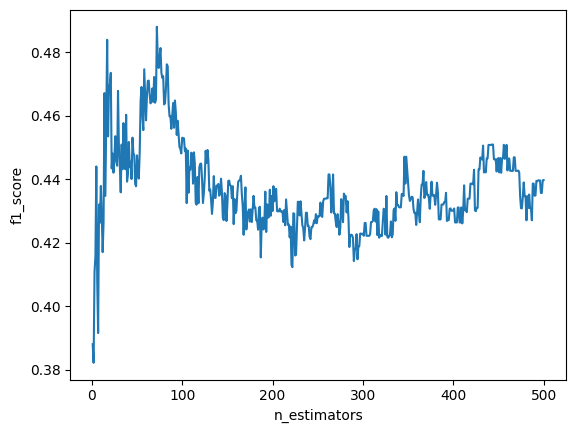

In [12]:
#ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

#データの読み込み
train = pd.read_csv("./original/train.csv")
test = pd.read_csv("./original/test.csv")

#データの形式を確認
print(train.shape) # (2000, 22)
print(test.shape) # (1000, 21)

#特徴量と目的変数に分ける
X = train.drop("price_range", axis=1)
y = train["price_range"]

#学習用データと評価用データに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

#特徴量のスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test)

# モデルのパフォーマンスを保存するリスト
n_estimators_list = []
f1_score_list = []

# n_estimatorsの範囲でループ
for n_estimators in range(1, 501):
    #ランダムフォレストモデルの作成と学習
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=1)
    model.fit(X_train, y_train)

    #評価用データの価格帯の予測
    y_pred = model.predict(X_test)

    #f1_scoreによる評価
    y_val_pred = model.predict(X_val)
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    print(f"n_estimators: {n_estimators}, f1_score(val): {f1_val}")

    # n_estimatorsとf1_scoreをリストに追加
    n_estimators_list.append(n_estimators)
    f1_score_list.append(f1_val)

#グラフを出力
plt.plot(n_estimators_list, f1_score_list)
plt.xlabel("n_estimators")
plt.ylabel("f1_score")
plt.show()

#予測結果の出力
output = pd.DataFrame({"index": test["id"], "price_range": y_pred})
output.to_csv("./submission/submission_rf_v4.csv", index=False, header=False)


In [2]:
output

,index,price_range
0,1,1
1,2,0
2,6,3
3,10,1
4,12,1
...,...,...
795,1978,3
796,1980,1
797,1982,3
798,1988,2
